#### - calculate information gain for feature selection
https://stackoverflow.com/questions/46752650/information-gain-calculation-with-scikit-learn

#### - smote for multiclass

#### - weight parameter in decision tree
#### - https://machinelearningmastery.com/imbalanced-multiclass-classification-with-the-glass-identification-dataset/

# M11 Practical Challenge: Decision Tree versus Random Forest Performance 

## Group Members:
- Eli Weiss
- Omar Hussein
- Julian Ruggiero

# Introduction

We will use a decision tree and a random forest to try and predict the Veil Color of a mushroom.<br>
The data set contains 8124 observations and 23 attributes of nominal data.<br> More information about the data can be found at: https://archive.ics.uci.edu/ml/datasets/mushroom <br>
We will use the the workflow below:

__Workflow__ <br>
__1)__ Data Profiling <br>
__2)__ Exploratory Data Analysis <br>
__3)__ Data Preparation <br>
__4)__ Preped Data Review <br>
__5)__ Modeling <br>
__6)__ Post-Modeling Exploratory Data Analysis <br>
__7)__ Select Models <br>
__8)__ Conclusions <br>

# Data Profiling

- __Poison:__                    p= poisenous e = edible
- __cap-shape:__                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- __cap-surface:__              fibrous=f,grooves=g,scaly=y,smooth=s
- __cap-color:__                brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- __bruises?:__                 bruises=t,no=f
- __odor:__                     almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- __gill-attachment:__          attached=a,descending=d,free=f,notched=n
- __gill-spacing:__             close=c,crowded=w,distant=d
- __gill-size:__                broad=b,narrow=n
- __gill-color:__               black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
- __stalk-shape:__              enlarging=e,tapering=t
- __stalk-root:__               bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- __stalk-surface-above-ring:__ fibrous=f,scaly=y,silky=k,smooth=s
- __stalk-surface-below-ring:__ fibrous=f,scaly=y,silky=k,smooth=s
- __stalk-color-above-ring:__   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- __stalk-color-below-ring:__   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- __veil-type:__                partial=p,universal=u
- __veil-color (response):__               brown=n,orange=o,white=w,yellow=y
- __ring-number:__              none=n,one=o,two=t
- __ring-type:__                cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- __spore-print-color:__        black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- __population:__               abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- __habitat:__                  grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Exploratory Data Analysis

In [1]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from yellowbrick.classifier import ConfusionMatrix
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
import os
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image

# styling matplotlib graphs
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)

C:\Users\julir\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
columns = ['Poison','cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment'
               ,'gill_spacing','gill_size','gill_color','stalk_shape','stalk_root',
              'stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring'
              ,'stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type'
               ,'spore_print_color','population','habitat']

In [3]:
#loading the data set
df=pd.read_csv("https://raw.githubusercontent.com/enwweiss/DAV-6150/master/M11_Data.csv", 
                names  = columns
              , header = None)

#sanity check
df.head()

,Poison,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#checking data types on raw data and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Poison                    8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

Replacing the single letter abbreviations used in the data with more descriptive character strings

In [5]:
# replace Edible col values
df.Poison.replace({'e': 'edible', 'p': 'poison'}, inplace = True)

# replace Cap Shape col values
#cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
df.cap_shape.replace({'b': 'bell', 'c': 'conical', 'x': 'convex',
                      'f': 'flat', 'k': 'knobbed', 's': 'sunken'}, inplace = True)

# replace Cap Surface col values
#cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
df.cap_surface.replace({'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},  inplace = True)

# replace Cap Color col values
#cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
df.cap_color.replace({'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 
                      'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 
                      'w': 'white', 'y': 'yellow'}, inplace = True)

#replace Bruises col values
#bruises: bruises=t,no=f
df.bruises.replace({'t': 'yes', 'f': 'no'}, inplace = True)

#replace Odor col values
#odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
df.odor.replace({'a': 'almond', 'l': 'anise', 'c': 'creosote', 
                'y': 'fishy', 'f': 'foul', 'm': 'musty', 
                'n': 'none', 'p': 'pungent', 's': 'spicy'}, inplace = True)

#replace Gill Attachment col values
#gill-attachment: attached=a,descending=d,free=f,notched=n
df.gill_attachment.replace({'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}, inplace = True)

#gill-spacing: close=c,crowded=w,distant=d
df.gill_spacing.replace({'c': 'close', 'w': 'crowded', 'd': 'distant'}, inplace = True)

#gill-size: broad=b,narrow=n
df.gill_size.replace({'b': 'broad', 'n': 'narrow'}, inplace = True)

#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
df.gill_color.replace({'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
                      'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink',
                      'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}, inplace = True)

#stalk-shape: enlarging=e,tapering=t
df.stalk_shape.replace({'e': 'enlarging', 't': 'tapering'}, inplace = True)

#stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
df.stalk_root.replace({'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 
                      'z': 'rhizomorphs', 'r': 'rooted'}, inplace = True)

#stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
df.stalk_surface_above_ring.replace({'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}, inplace = True)

#stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
df.stalk_surface_below_ring.replace({'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}, inplace = True)

# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
df.stalk_color_above_ring.replace({'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
                                  'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}, inplace = True)

# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
df.stalk_color_below_ring.replace({'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 
                                  'g': 'gray', 'o': 'orange', 'p': 'pink', 
                                  'e': 'red', 'w': 'white', 'y': 'yellow'}, inplace = True)

#veil-type: partial=p,universal=u
df.veil_type.replace({'p': 'partial', 'u': 'universal'}, inplace = True)

#veil-color: brown=n,orange=o,white=w,yellow=y
df.veil_color.replace({'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}, inplace = True)

#ring-number: none=n,one=o,two=t
df.ring_number.replace({'n': 'none', 'o': 'one', 't': 'two'}, inplace = True)

#ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
df.ring_type.replace({'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large',
                     'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}, inplace = True)

#spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
df.spore_print_color.replace({'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 
                             'r': 'green', 'o': 'orange', 'u': 'purple', 
                             'w': 'white', 'y': 'yellow'}, inplace = True)

#population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
df.population.replace({'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 
                      's': 'scattered', 'v': 'several', 'y': 'solitary'}, inplace = True)

#habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
df.habitat.replace({'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 
                   'u': 'urban', 'w': 'waste', 'd': 'woods'}, inplace = True)

We can see that there aren't any null values in any of the columns. Now we will start the EDA on the attributes, as all of them are categorical we can visualize them using histograms. We first create a list for all the categorical ones then we analyze the response.

In [6]:
explanatory = columns.copy()
explanatory.remove('veil_color')

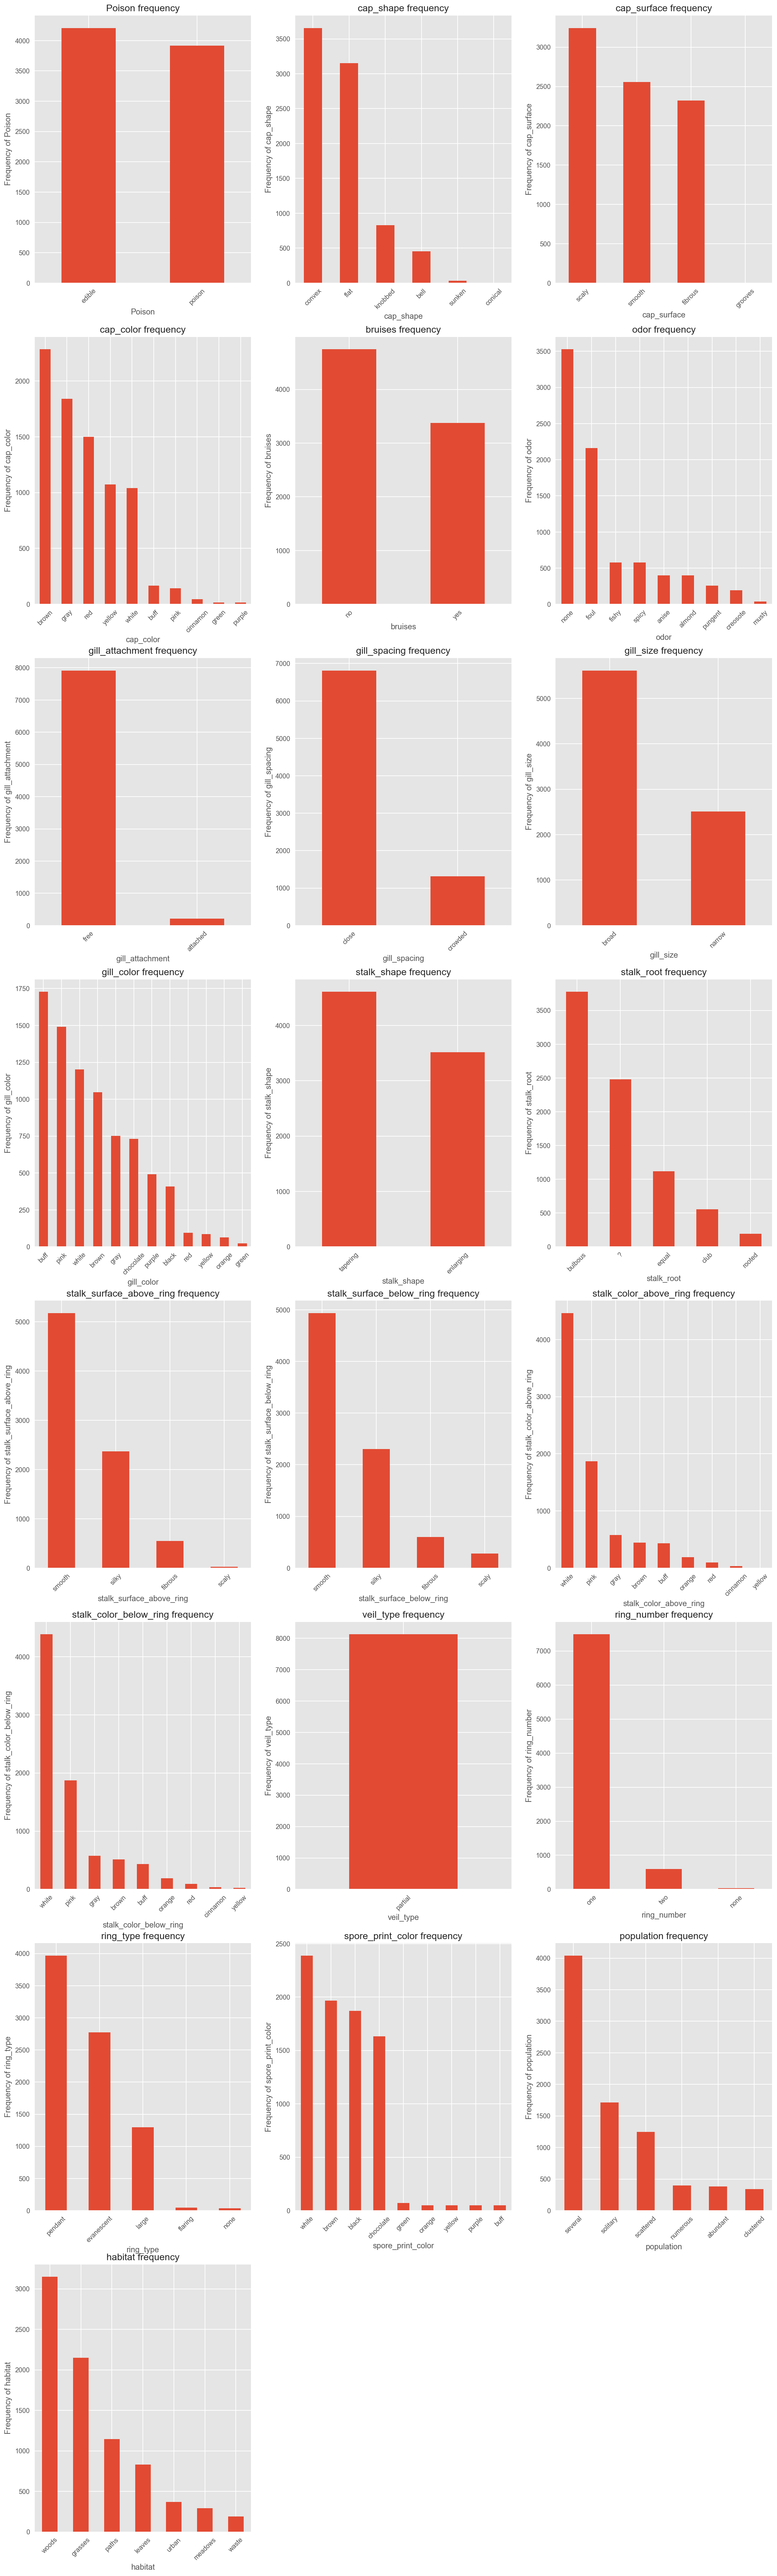

In [7]:
#define a figure to which we will add histogram of each attribute.
plt.figure(figsize=(20,70))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in explanatory:   #for each numeric column in the dataframe
    plt.subplot(8,3,j)
    df[k].value_counts().plot(kind='bar');
    plt.title(str(k) + ' frequency')
    plt.xlabel(k)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency of ' + k)
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.show();

- __Poison:__ Has two values one for poisenous one for edible
- __cap-shape:__ Has sparse classes may need grouping via thresholding
- __cap-surface:__ Has one sparse class
- __cap-color:__ Has sparse classes may need grouping via thresholding
- __bruises:__  Has two values one for bruises and one for no bruises
- __odor:__ Has sparse classes may need grouping via thresholding
- __gill-attachment:__ Imbalanced 
- __gill-spacing:__ Imbalanced 
- __gill-size:__ Imbalanced 
- __gill-color:__ Has sparse classes may need grouping via thresholding
- __stalk-shape:__  Has two values relativly balanced
- __stalk-root:__   has all of the vlaues specificed in the documentation has some sparse calsses, contains '?' as a value
- __stalk-surface-above-ring:__ has all of the values specificed in the documentation has some sparse calsses
- __stalk-surface-below-ring:__ has all of the values specificed in the documentation has some sparse calsses
- __stalk-color-above-ring:__   has all of the vlaues specificed in the documentation has some sparse calsses
- __stalk-color-below-ring:__   has all of the vlaues specificed in the documentation has some sparse calsses
- __veil-type:__                Contains only on value needs to be removed
- __ring-number:__              has all of the values specificed in the documentation has some sparse calsses
- __ring-type:__                has all of the values specificed in the documentation has some sparse calsses __(not really, needs some review, there are different values in the data dictionary and in the data)__
- __spore-print-color:__        has all of the values specificed in the documentation has some sparse calsses
- __population:__               has all of the values specificed in the documentation has some sparse calsses
- __habitat:__                  has all of the values specificed in the documentation has some sparse calsses

In [8]:
#get response counts and percentages
df_response = df.veil_color.value_counts().to_frame('occurences')
df_response['%_occurences'] = df_response.occurences / df.shape[0]
df_response

,occurences,%_occurences
white,7924,0.975382
orange,96,0.011817
brown,96,0.011817
yellow,8,0.000985


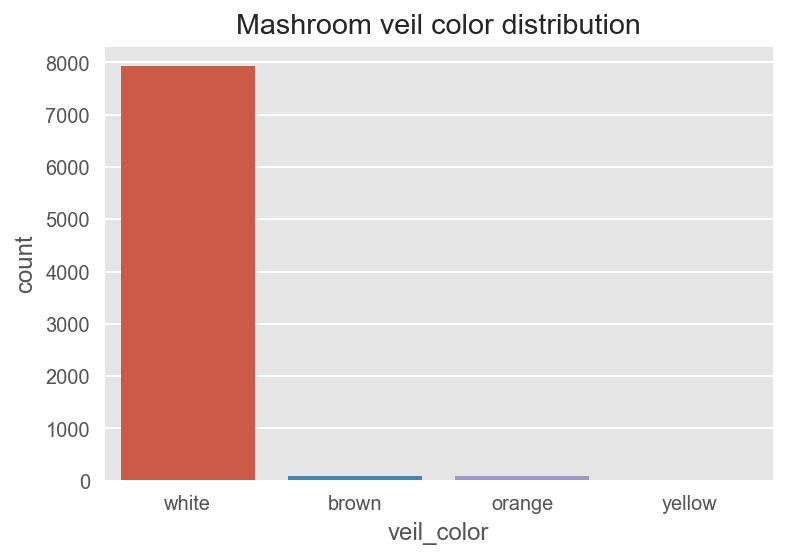

In [9]:
sns.countplot(x = 'veil_color', data = df).set_title("Mashroom veil color distribution");

We can see a highly imbalance response variable, where 97,5% of records corresponds to mashrooms with a white veil color, followed by brown and orange with 0.01% each, and finally yellow with only 0.001%. <br>
Given the fact that it is imbalance accuracy is not the best metric since we have a null error rate of 0,975.

Before making any changes lets look at the impact of each of them with the response (veil-color)

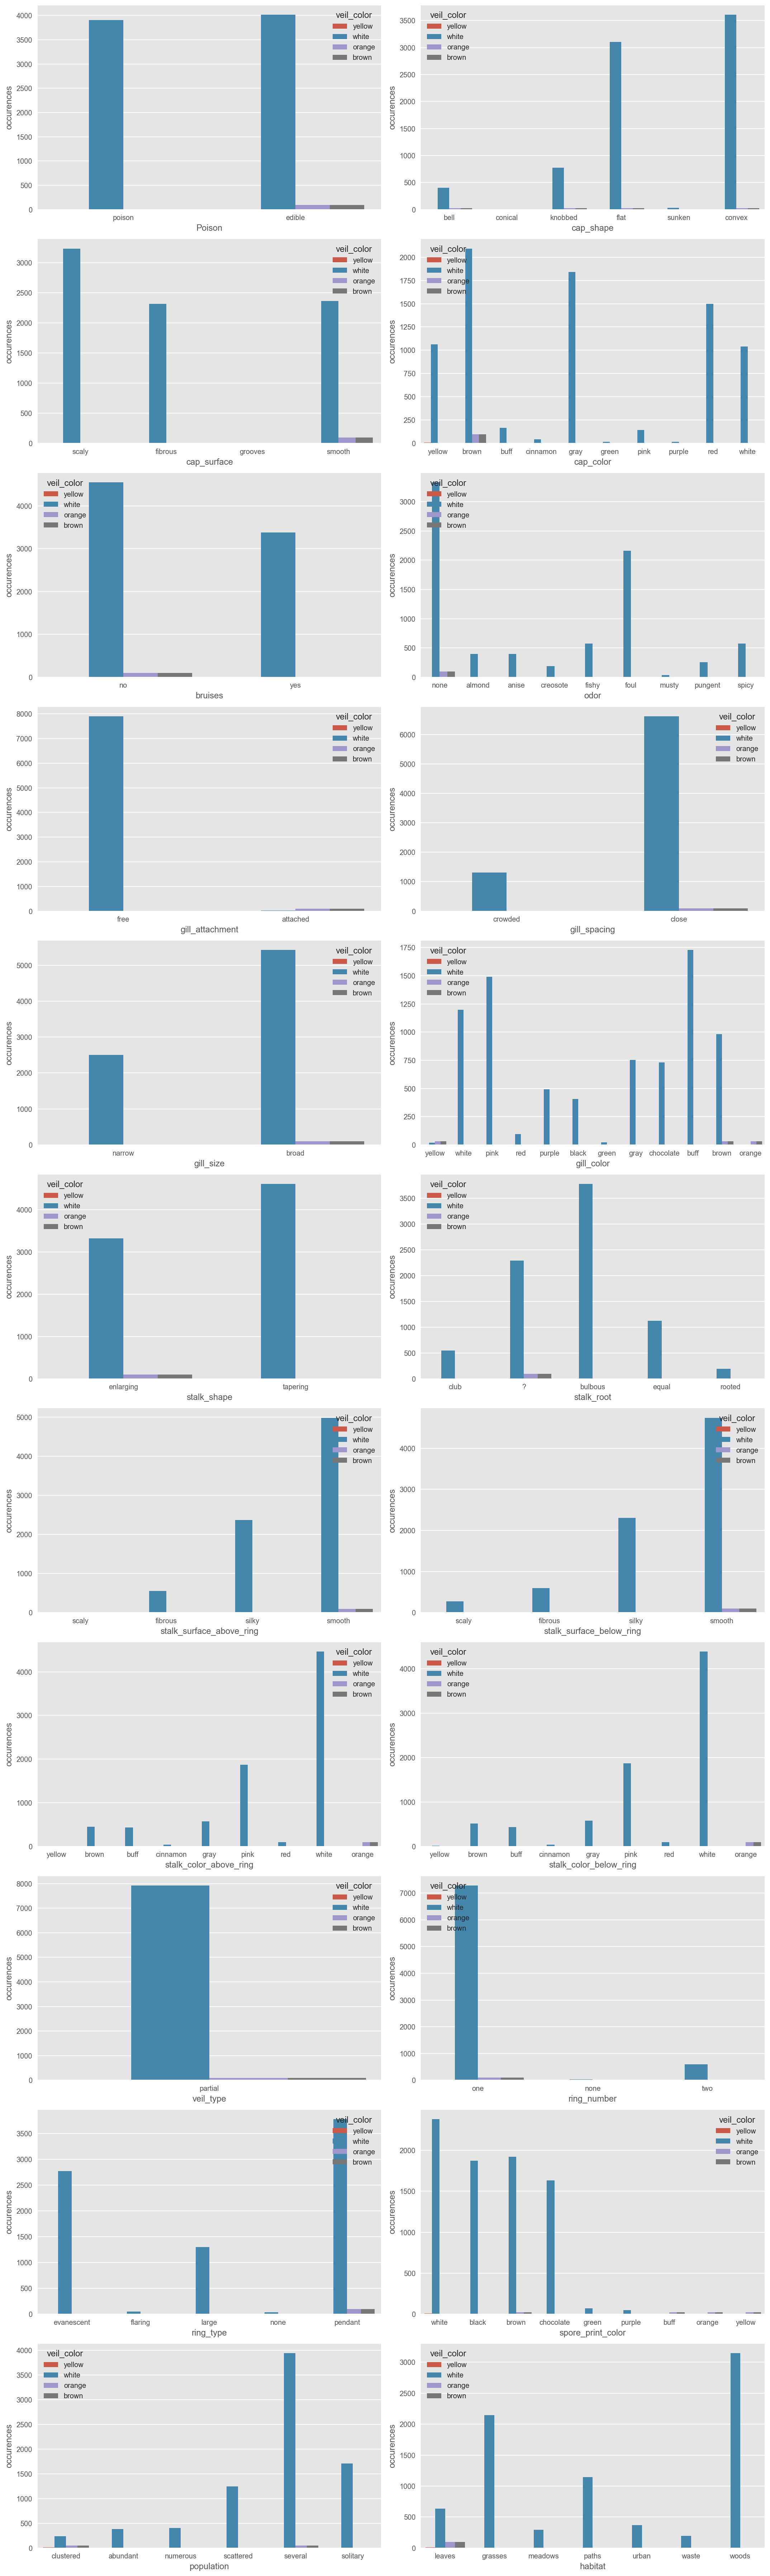

In [10]:
#define a figure to which we will add histogram of each attribute.
plt.figure(figsize=(15,50))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in explanatory:   #for each numeric column in the dataframe
    plt.subplot(11,2,j)
    dt = df.groupby([k,'veil_color']).size().to_frame('occurences').reset_index().sort_values(by='veil_color', ascending=False)
    sns.barplot(x=k, y='occurences', hue='veil_color', data=dt)
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.tight_layout()
plt.show();

From this graphs we can see that there are a high number of attributes that seem to be good predictor s for veil type. For example:
- Poison (only edible seems to have other veil color than white)
- Cap_surface (only smooth seems to have other veil color than white)
- Cap_color (only brown seems to have other veil color than white)
- Bruises (only when there are no bruises there seems to be other veil color than white)
- Odor (only mushrooms with none odor seems to have other veil color than white)

Similar situation happens with gill_attachment, gill_size, gill_color, stalk_shape, stalk_color, ring_number and ring_type, where for a specific value in this features the mashroom has a different color than white.

For stalk_root the only value that have mashrooms with different color than white is unknown, as we can see the question mark '?'.

We can also see that stalk_surface_above_ring and stalk_surface_below_ring seem to have very similar distribution with the response, so for decision trees and random forests we might want to reduce the linear relationship by only taking one of these 2 attributes. Same between stalk_color_above_ring and  stalk_color_below_ring.



Before doing data preparation we check the number of missing values in the stalk_root

In [11]:
df['stalk_root'][df['stalk_root'] =='?'].count()
#Let's consider this another class? it's too big to get rid of

2480

In [12]:
#check if there are other NAs
NA_Count = 0
for i in columns:   
    NA_Count = NA_Count + df[i][df[i] =='?'].count()
print(NA_Count)

2480


There are no other NAs in the data set, and considering there is a signifficant number of records with missing values we won't delete them, rather we will have a class type 'missing' or 'unknown'.
__We could also do some research and assign a valid value rather than 'missing'__

# Data Preparation

### Remove Attribute
Considering veil_type has only one single value 'partial' wen can drop the entire column.

In [13]:
df.veil_type.value_counts()
#Drop this attribute since it is homogonous

partial    8124
Name: veil_type, dtype: int64

In [14]:
del df['veil_type']
columns = df.columns.to_list()

In [15]:
len(columns)

22

### Convert Data to Numeric

We will split this task into 2 parts <br>

__1)__ we will transform the binary columns to 0 and 1 with meaningful meaning for the 1 according to the column name. <br>
__2)__ Use one hot encoding to transform the rest of the categorical nominal attributes.

In [16]:
df.Poison.replace({'poison': 1, 'edible': 0}, inplace = True)
df.bruises.replace({'yes': 1, 'no': 0}, inplace = True)
df.ring_number.replace({'none': 0, 'one': 1, 'two': 2}, inplace = True)
df.stalk_root.replace({'?': 'missing'}, inplace = True)

In [17]:
dummy_columns = columns.copy()
dummy_columns.remove('Poison')
dummy_columns.remove('bruises')
dummy_columns.remove('ring_number')
dummy_columns.remove('veil_color')

In [18]:
df.shape

(8124, 22)

In [19]:
df = pd.get_dummies(df, columns=dummy_columns)

In [20]:
df.head()

,Poison,bruises,veil_color,ring_number,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,1,white,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,white,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,white,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,white,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,white,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Prepped Data Review

# Decision Tree + Random Forest Modeling

### Decision Tree - Full Model

In [21]:
explanatory_new = list(df.columns.copy())
explanatory_new.remove('veil_color')

In [22]:
# Make a decision tree and train
clf = DecisionTreeClassifier(random_state=50)
X = df[explanatory_new]
y = df['veil_color']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 0)

In [24]:
# Train tree
clf.fit(X_train, y_train)
print(f'Decision tree has {clf.tree_.node_count} nodes with maximum depth {clf.tree_.max_depth}.')

Decision tree has 165 nodes with maximum depth 10.


In [25]:
# Make probability predictions
train_probs = clf.predict_proba(X_train)[:, 1]
probs = clf.predict_proba(X_test)[:, 1]

train_predictions = clf.predict(X_train)
predictions = clf.predict(X_test)

In [26]:
unique_elements, counts_elements = np.unique(train_predictions, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['brown' 'orange' 'white' 'yellow']
 [120 19 6353 7]]


Evaluating on the training set

https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

C:\Users\julir\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\julir\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


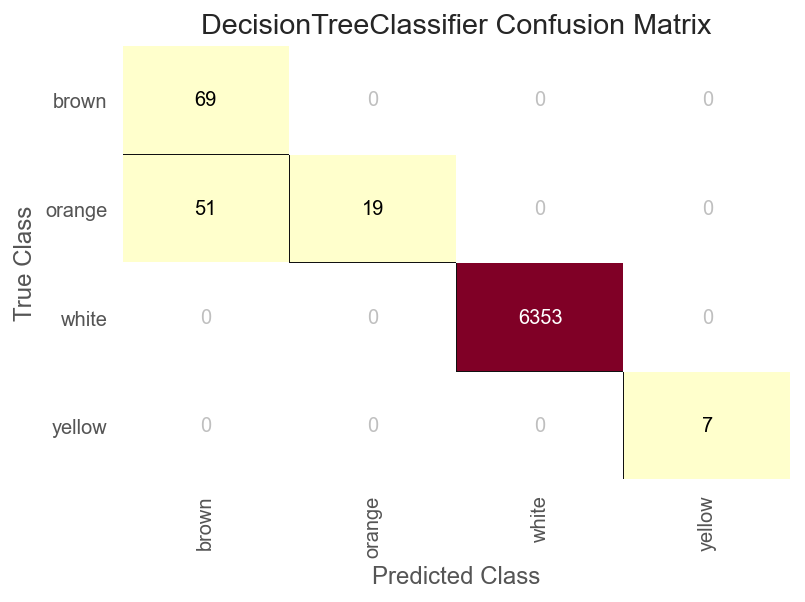

In [27]:
model_cm = ConfusionMatrix(
    clf, classes=["brown", "orange", "white", "yellow"]
)
model_cm.score(X_train, y_train)
model_cm.show()

In [28]:
mcm_training = multilabel_confusion_matrix(train_predictions, y_train, labels=["brown", "orange", "white", "yellow"])

In [29]:
tn = mcm_training[:, 0, 0]
tp = mcm_training[:, 1, 1]
fn = mcm_training[:, 1, 0]
fp = mcm_training[:, 0, 1]

In [30]:
#Calculating metrics
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + fp + fn + tn)

metrics_summary = pd.DataFrame()
metrics_summary['Class'] = ['Brown', 'Orange','White','Yellow']
metrics_summary['Specificity'] = specificity
metrics_summary['Recall'] = recall
metrics_summary['Precision'] = precision
metrics_summary['F1'] = f1
metrics_summary['Accuracy'] = accuracy
metrics_summary

,Class,Specificity,Recall,Precision,F1,Accuracy
0,Brown,1.00000,0.575,1.000000,0.730159,0.992153
1,Orange,0.99213,1.000,0.271429,0.426966,0.992153
2,White,1.00000,1.000,1.000000,1.000000,1.000000
3,Yellow,1.00000,1.000,1.000000,1.000000,1.000000


https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [31]:
print('Weighted F1-score: {:.2f}'.format(metrics.f1_score(y_train, train_predictions, average='weighted')))

Weighted F1-score: 0.99


In [32]:
#takes the avg of the 4 F1 scores
print('Macro F1-score: {:.2f}\n'.format(metrics.f1_score(y_train, train_predictions, average='macro')))

Macro F1-score: 0.79



Evaluating on the test set

In [33]:
#creating a multiclass matrix
mcm = multilabel_confusion_matrix(y_test, predictions, labels=["brown", "orange", "yellow", "white"])
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]

In [34]:
#Calculating metrics
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + fp + fn + tn)

metrics_summary = pd.DataFrame()
metrics_summary['Class'] = ['Brown', 'Orange','White','Yellow']
metrics_summary['Specificity'] = specificity
metrics_summary['Recall'] = recall
metrics_summary['Precision'] = precision
metrics_summary['F1'] = f1
metrics_summary['Accuracy'] = accuracy
metrics_summary

,Class,Specificity,Recall,Precision,F1,Accuracy
0,Brown,0.985607,0.185185,0.178571,0.181818,0.972308
1,Orange,0.986241,0.115385,0.120000,0.117647,0.972308
2,White,1.000000,1.000000,1.000000,1.000000,1.000000
3,Yellow,1.000000,1.000000,1.000000,1.000000,1.000000


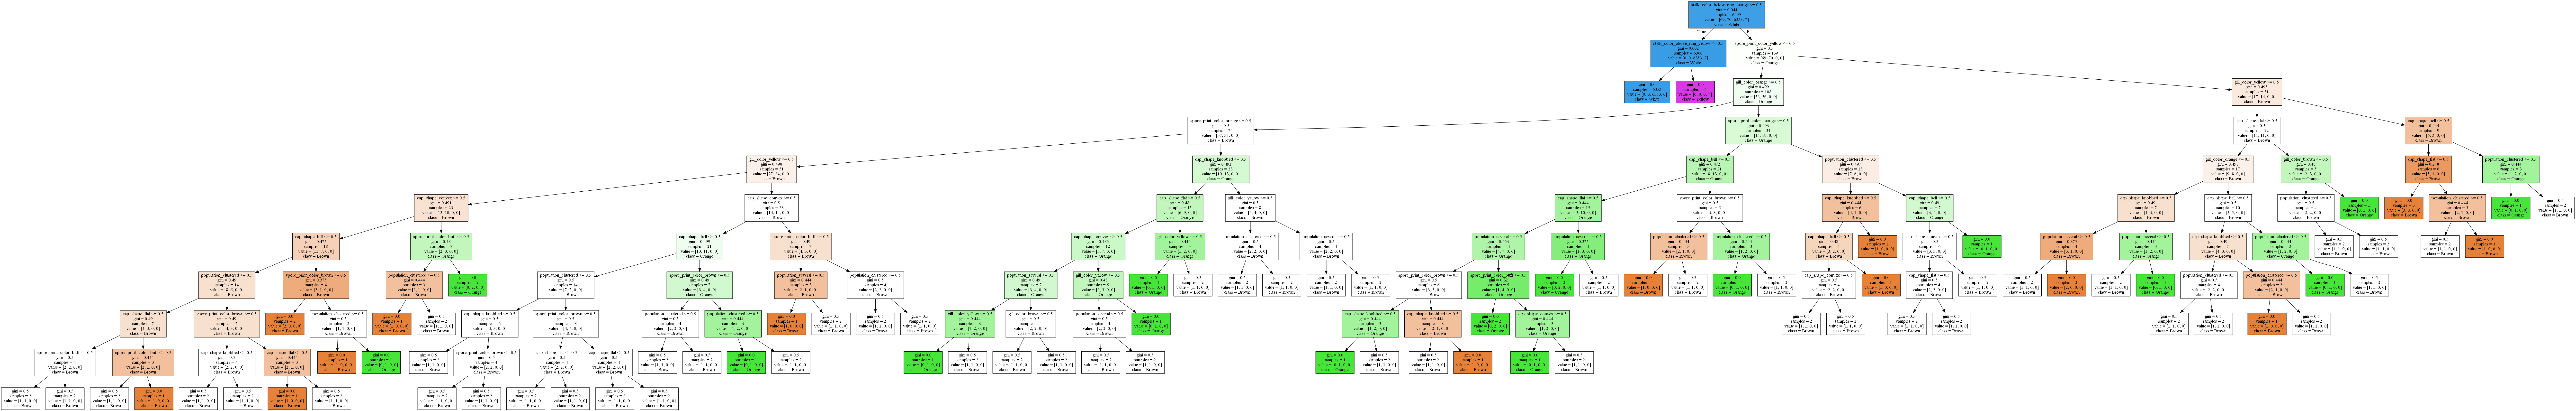

In [40]:
#to allow visualizing the image
#package can be downloaded from https://graphviz.gitlab.io/download/.
#once installed we have to reference the bin folder like below
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
tree.export_graphviz(
    clf,
    out_file=dot_data,
    feature_names=explanatory_new,
    class_names=['Brown', 'Orange','White','Yellow'],
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)
Image(g.create_png())

In [119]:
fi = pd.DataFrame({'feature': explanatory_new,
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
78,stalk_color_below_ring_orange,0.862500
73,stalk_color_above_ring_yellow,0.059200
98,population_clustered,0.017072
3,cap_shape_bell,0.010798
101,population_several,0.009537


### Random Forest - Full Model

In [123]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=50,
                       verbose=1)

In [124]:
n_nodes = []
max_depths = []

for ind_tree in rf_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 128
Average maximum depth 11


In [125]:
train_rf_predictions = rf_model.predict(X_train)
train_rf_probs = rf_model.predict_proba(X_train)[:, 1]

rf_predictions = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


C:\Users\julir\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\julir\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


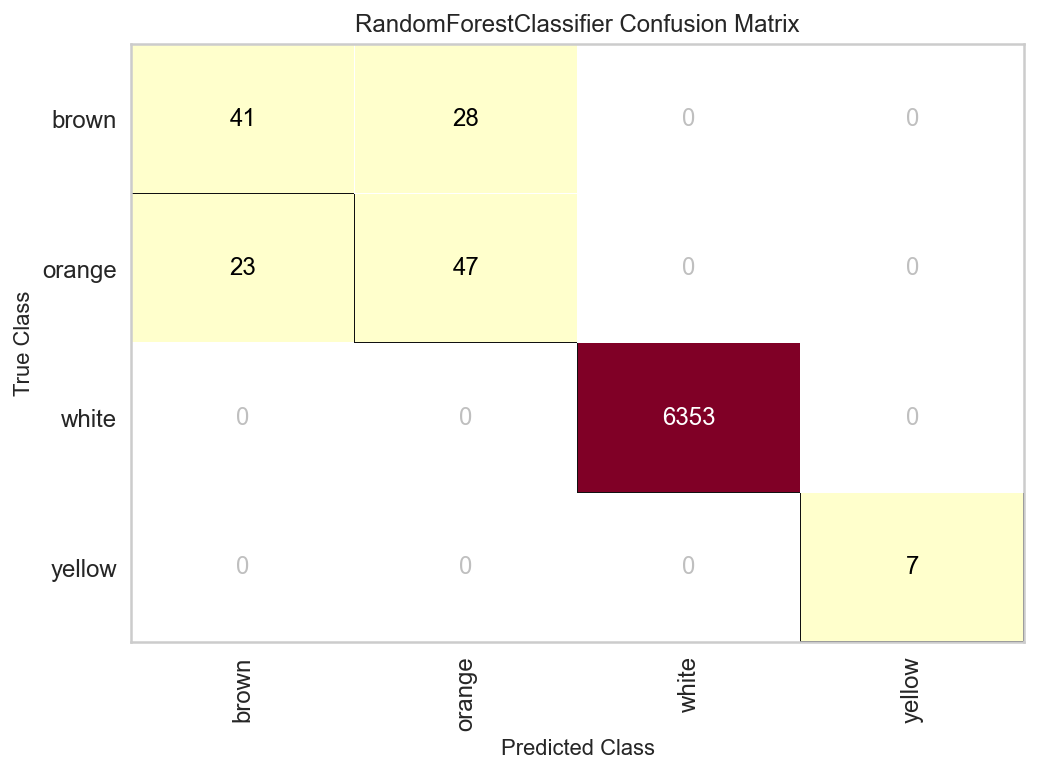

In [127]:
model_cm = ConfusionMatrix(
    rf_model, classes=["brown", "orange", "white", "yellow"]
)
model_cm.score(X_train, y_train)
model_cm.show()

In [128]:
mcm_training = multilabel_confusion_matrix(train_rf_predictions, y_train, labels=["brown", "orange", "white", "yellow"])
tn = mcm_training[:, 0, 0]
tp = mcm_training[:, 1, 1]
fn = mcm_training[:, 1, 0]
fp = mcm_training[:, 0, 1]

#Calculating metrics
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + fp + fn + tn)

metrics_summary = pd.DataFrame()
metrics_summary['Class'] = ['Brown', 'Orange','White','Yellow']
metrics_summary['Specificity'] = specificity
metrics_summary['Recall'] = recall
metrics_summary['Precision'] = precision
metrics_summary['F1'] = f1
metrics_summary['Accuracy'] = accuracy
metrics_summary

,Class,Specificity,Recall,Precision,F1,Accuracy
0,Brown,0.995649,0.640625,0.594203,0.616541,0.992153
1,Orange,0.996420,0.626667,0.671429,0.648276,0.992153
2,White,1.000000,1.000000,1.000000,1.000000,1.000000
3,Yellow,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
#takes the avg of the 4 F1 scores
print('Macro F1-score: {:.2f}\n'.format(metrics.f1_score(y_train, train_rf_predictions, average='macro')))

Macro F1-score: 0.82



Evaluating on testing set

In [ ]:
#creating a multiclass matrix
mcm = multilabel_confusion_matrix(y_test, rf_predictions, labels=["brown", "orange", "yellow", "white"])
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]

In [130]:
#Calculating metrics
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + fp + fn + tn)

metrics_summary = pd.DataFrame()
metrics_summary['Class'] = ['Brown', 'Orange','White','Yellow']
metrics_summary['Specificity'] = specificity
metrics_summary['Recall'] = recall
metrics_summary['Precision'] = precision
metrics_summary['F1'] = f1
metrics_summary['Accuracy'] = accuracy
metrics_summary

,Class,Specificity,Recall,Precision,F1,Accuracy
0,Brown,0.995649,0.640625,0.594203,0.616541,0.992153
1,Orange,0.996420,0.626667,0.671429,0.648276,0.992153
2,White,1.000000,1.000000,1.000000,1.000000,1.000000
3,Yellow,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
#takes the avg of the 4 F1 scores
print('Macro F1-score: {:.2f}\n'.format(metrics.f1_score(y_test, rf_predictions, average='macro')))

Macro F1-score: 0.57



## Decision Tree

## Random Forest

# Model Selection

# Conclusions